# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [0]:
import numpy
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

In [3]:
(x_img_train, y_label_train), \
(x_img_test, y_label_test) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [5]:
print('train: ', len(x_img_train))
print('test: ', len(x_img_test))

train:  50000
test:  10000


In [8]:
print('x_img_train: ', x_img_train.shape)
print('x_img_test: ', x_img_test.shape)
print('y_label_train: ', y_label_train.shape)
print('y_label_test: ', y_label_test.shape)

x_img_train:  (50000, 32, 32, 3)
x_img_test:  (10000, 32, 32, 3)
y_label_train:  (50000, 1)
y_label_test:  (10000, 1)


In [28]:
key = np.arange(0, 101)
values = []
for k in key:
    values.append(str(k))

label_dict = dict(zip(key, values))
print(label_dict)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61', 62: '62', 63: '63', 64: '64', 65: '65', 66: '66', 67: '67', 68: '68', 69: '69', 70: '70', 71: '71', 72: '72', 73: '73', 74: '74', 75: '75', 76: '76', 77: '77', 78: '78', 79: '79', 80: '80', 81: '81', 82: '82', 83: '83', 84: '84', 85: '85', 86: '86', 87: '87', 88: '88', 89: '89', 90: '90', 91: '91', 92: '92', 93: '93', 94: '94', 95: '95', 96: '96', 97: '97', 98: '98', 99: '99', 100: '100'}


In [0]:
import matplotlib.pyplot as plt

def plot_image_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        
        title = str(i) + '.' + label_dict[labels[i][0]]
        if len(prediction)>0:
            title += '=>' + label_dict[prediction[i][0]]
        
        ax.set_title(title, fontsize=14)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

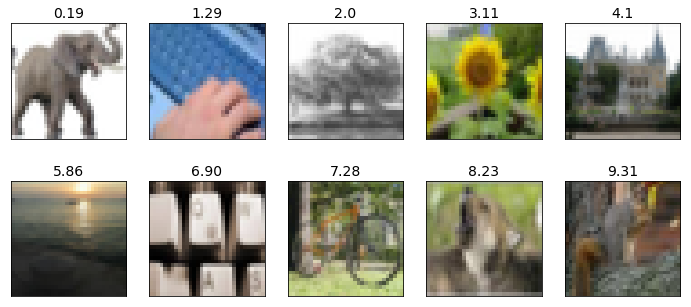

In [55]:
plot_image_labels_prediction(x_img_train, y_label_train, [], 9)

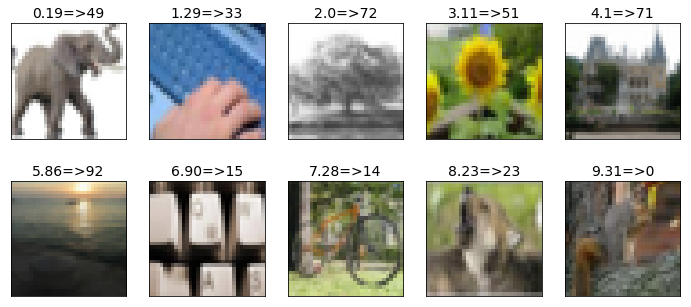

In [54]:
plot_image_labels_prediction(x_img_train, y_label_train, y_label_test, 9)

In [48]:
y_label_test

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

# Image normalize 

In [61]:
x_img_train[0][30][31]

array([141, 161,  87], dtype=uint8)

In [62]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
x_img_train_normalize[0][30][31]

array([0.5529412 , 0.6313726 , 0.34117648], dtype=float32)

# 轉換label 為OneHot Encoding

In [0]:
from keras.utils import np_utils
y_label_train_Onehot = np_utils.to_categorical(y_label_train)
y_label_test_Onehot = np_utils.to_categorical(y_label_test)

In [65]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [66]:
y_label_train_Onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.